# Install these dependencies

1. `conda install numpy pandas seaborn sklearn nltk graphviz pygraphviz jupyter spacy ipywidgets`
2. `python -m spacy download en_core_web_md`
3. `python -m pip install "msgpack<0.6.0"` - Bug with spacy

In [1]:
import math
import re
import io

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from IPython.core.display import HTML

from sklearn import tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve, StratifiedShuffleSplit, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

import nltk
import graphviz 


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
SEED = 1
%matplotlib inline
sns.set()
sns.set_context("talk", rc={"lines.linewidth": 2})

# Download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jerem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-is-Machine-Learning" data-toc-modified-id="What-is-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What is Machine Learning</a></span><ul class="toc-item"><li><span><a href="#Simple-Classification-Example" data-toc-modified-id="Simple-Classification-Example-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simple Classification Example</a></span></li><li><span><a href="#Example-Project---Autonomous-Vehicle-(AV)-using-Supervised-Learning" data-toc-modified-id="Example-Project---Autonomous-Vehicle-(AV)-using-Supervised-Learning-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Example Project - Autonomous Vehicle (AV) using Supervised Learning</a></span></li><li><span><a href="#Basic-Terms" data-toc-modified-id="Basic-Terms-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Basic Terms</a></span></li><li><span><a href="#Assessing-Performance" data-toc-modified-id="Assessing-Performance-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Assessing Performance</a></span></li></ul></li><li><span><a href="#Simple-Regression-Model" data-toc-modified-id="Simple-Regression-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simple Regression Model</a></span><ul class="toc-item"><li><span><a href="#Bias-vs-Variance" data-toc-modified-id="Bias-vs-Variance-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bias vs Variance</a></span></li></ul></li><li><span><a href="#Simple-Classification-Example" data-toc-modified-id="Simple-Classification-Example-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Simple Classification Example</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression---Binary" data-toc-modified-id="Logistic-Regression---Binary-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Logistic Regression - Binary</a></span></li><li><span><a href="#Logistic-Regression---Multiple-Classes" data-toc-modified-id="Logistic-Regression---Multiple-Classes-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Logistic Regression - Multiple Classes</a></span></li></ul></li><li><span><a href="#Support-Vector-Machines" data-toc-modified-id="Support-Vector-Machines-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Support Vector Machines</a></span><ul class="toc-item"><li><span><a href="#Kernel-Trick" data-toc-modified-id="Kernel-Trick-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Kernel Trick</a></span></li></ul></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decision Trees</a></span><ul class="toc-item"><li><span><a href="#Random-Forests" data-toc-modified-id="Random-Forests-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Random Forests</a></span></li></ul></li></ul></li><li><span><a href="#Break" data-toc-modified-id="Break-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Break</a></span></li><li><span><a href="#Natural-Language-Processing" data-toc-modified-id="Natural-Language-Processing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Natural Language Processing</a></span><ul class="toc-item"><li><span><a href="#Basic-Fundamentals-of-NLP" data-toc-modified-id="Basic-Fundamentals-of-NLP-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Basic Fundamentals of NLP</a></span><ul class="toc-item"><li><span><a href="#Look-at-Data" data-toc-modified-id="Look-at-Data-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Look at Data</a></span></li><li><span><a href="#Preprocess-Text" data-toc-modified-id="Preprocess-Text-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Preprocess Text</a></span></li><li><span><a href="#Tokenization" data-toc-modified-id="Tokenization-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Tokenization</a></span></li><li><span><a href="#Compute-Term-Frequency-Inverse-document-Frequency-(TF-IDF)" data-toc-modified-id="Compute-Term-Frequency-Inverse-document-Frequency-(TF-IDF)-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Compute Term Frequency-Inverse document Frequency (TF-IDF)</a></span></li><li><span><a href="#Choose-Models-and-fit" data-toc-modified-id="Choose-Models-and-fit-5.1.5"><span class="toc-item-num">5.1.5&nbsp;&nbsp;</span>Choose Models and fit</a></span></li><li><span><a href="#Hyperparamter-Tuning" data-toc-modified-id="Hyperparamter-Tuning-5.1.6"><span class="toc-item-num">5.1.6&nbsp;&nbsp;</span>Hyperparamter Tuning</a></span></li><li><span><a href="#Things-to-improve" data-toc-modified-id="Things-to-improve-5.1.7"><span class="toc-item-num">5.1.7&nbsp;&nbsp;</span>Things to improve</a></span></li></ul></li><li><span><a href="#NLP-Advanced-Feature-Extraction" data-toc-modified-id="NLP-Advanced-Feature-Extraction-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>NLP Advanced Feature Extraction</a></span></li></ul></li><li><span><a href="#Break" data-toc-modified-id="Break-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Break</a></span></li><li><span><a href="#Computer-Vision" data-toc-modified-id="Computer-Vision-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Computer Vision</a></span><ul class="toc-item"><li><span><a href="#Computer-Vision-Challenges-and-Advances" data-toc-modified-id="Computer-Vision-Challenges-and-Advances-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Computer Vision Challenges and Advances</a></span></li></ul></li></ul></div>

# Multidisciplinary Design Program

# Introduction to Machine Learning 

<br>
<br>
<br>

Jeremy Castagno 
jdcasta@umich.edu

Slides and Code available on Github: https://github.com/JeremyBYU/mdp-machine-learning

02/13/2019

<font size="14">About Me - Jeremy Castagno</font>

* 2013 - BSc. in Chemical Engineering at BYU
* Valero Energy Corporation as process control engineer
* 2016 – Robotics PhD University of Michigan

<center> <img src="assets/refinery.jpg" height="600"><center>


<br>

* Topic interests - Artificial Intelligence, Machine Learning, Path Planning, Simulation
* Research topic – Unmanned Aerial System (UAS) emergency rooftop landing in urban cities
![](assets/airsim.gif)

## What is Machine Learning


* Statistical Learning, Pattern Recognition, Big Data, Data Mining, Expert Systems, Artificial Intelligence (AI), Deep Learning
* Definition- Algorithms and Statistical Models to perform a specific task
* Broadly speaking there are three categories of ML- **supervised** learning, **unsupervised** learning, and **reinforcement** learning
* In this *short* class we will focus only on **supervised** learning
* In almost all cases there is an <font color='blue'>input</font> (x) and an <font color='green'>output</font> (y) for our system


<center> <img src="assets/x_to_y.png" width="900px" height="500px"><center>

<center>There is a true $f(x)$ which we seek to approximate with an $\hat{f}(x)$</center>

**MDP Projects**

* Analyzes $\color{blue}{\text{audio inputs}}$, with a goal of determining factors such as $\color{green}{\text{occupants, locations, and state of vehicle}}$
* Process the $\ldots \color{blue}{\text{road itself}} \ldots$ to identify $\color{green}{\text{free paths or drivable surfaces}}$
* Recognize $\ldots \color{blue}{\text{email}} \ldots$ and <font color='green'>direct email to appropriate response functions [classification]</font> as well as $\color{green}{\text{suggesting a generated response}}$ 

### Simple Classification Example

* Iris dataset - https://archive.ics.uci.edu/ml/datasets/Iris
* <font color='blue'>Input</font> - Sepal Length, Sepal Width, Petal Length, Petal Width
* <font color='green'>Output</font> - Class prediction (Setosa, Veriscolor, Virginica)
<center><img src="assets/iris-pictures.png"> </img> </center>

Image - https://www.datacamp.com/community/tutorials/machine-learning-in-r

### Example Project - Autonomous Vehicle (AV) using Supervised Learning

Note - You would never do this to for an AV.  This was just a fun class project to show off machine learning, neural networks, and our new found robot skills.

<center><img src="assets/robot_example/robot_car.PNG" width="500px">

   <img src="assets/robot_example/environment_post.jpg" width="300px">
</center>

<center>
   <img src="assets/robot_example/point_cloud.jpg" width="400px">

</center>

Robot Gathered distance measurement and sent to a neural network. Output of neural network was a steering angle.

<font color='blue'>LiDAR Data</font>: 360 Degrees distance measurement
<br>

| Angle    | 1° | 2°  | ... | 358° | 359° |
|----------|----|-----|-----|------|------|
| Distance | 1  | 1.2 | ... | 1.5  | 1.5  |


<font color='green'>Steering Angle</font>: 0 -360 degrees

<center> <video width="560" height="320" src="./assets/robot_example/mdp_regresssion_model_1.mp4" frameborder="0" allowfullscreen controls muted></video> </center>

### Basic Terms

* Regression vs Classification



* Regression - Output takes continuous valued variables
* Classification - Output determines group membership (class)
  * Sometimes the output is **both** - Semantic bounding boxes
* Features, predictors, independent variables - text email, audio stream, video stream
    * Iris Classification - Sepal Length, Sepal Width, Petal Length, Petal Width
* Ground Truth Labels - Classes, y
    * Iris Classification - Species Prediction


**Supervised Learning**

Learning a function that maps an *input* ($X$) to and *output* ($Y$), given labeled training data
<br> <br>
<center>
$$
Y=f(X)+ \underbrace{\epsilon}_{noise} \\
\hat{Y}=\hat{f}(X) 
$$
    

</center>


<center>
$ \mathbf{X}=\overbrace{ \left( \begin{array}{cccc}{x_{11}} & {x_{12}} & {\dots} & {x_{1 p}} \\ {x_{21}} & {x_{22}} & {\dots} & {x_{2 p}} \\ {\vdots} & {\vdots} & {\ddots} & {\vdots} \\ {x_{n 1}} & {x_{n 2}} & {\dots} & {x_{n p}}\end{array}\right)}^{Features}$
</center>

<center>
$ \mathbf{Y}=\overbrace{\left( \begin{array}{c}{y_{1}} \\ {y_{2}} \\ {\vdots} \\ {y_{n}}\end{array}\right)}^{labels} $
</center>

* Main Questions:
    * Should we preprocess our raw data into better features? Text $\implies$ Vector
    * What is the relationship between the response and each feature?
    * What model can be used to estimate f?
        * Parametric Functions - $Y = mx + b$
        * Won't go over non parametric functions in this class

In [2]:
# * Share an example?
# * How do we determine relationships?
#   * Cross Covariance, Plotting
# ![](assets/covariance.png)


### Assessing Performance

* Training Set and Test Set - Split 60/40
    * Your model should never be trained with the test set
* Regression 
  * Mean Squared Error (MSE) = $ MSE=\frac{1}{n} \sum_{i=1}^{n}\left(y_{i}-\hat{f}\left(x_{i}\right)\right)^{2} $
* Classification
  * Training use Logarithmic Loss - $ \frac{-1}{N} \sum_{i=1}^{N} \sum_{j=1}^{M} y_{i j} * \log \left(p_{i j}\right) $
  * Final Assessment
      * Classification Accuracy = $\frac{\text{# of correct pred.}}{\text{Total # of pred.}}$ 
      * True Positive, True Negative, False Positives, False Negatives


![](assets/Precisionrecall.png) 
Walber [<a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>], <a href="https://commons.wikimedia.org/wiki/File:Precisionrecall.svg">from Wikimedia Commons</a>

# ![](assets/Precisionrecall2.png) 

<center>$ F_{1}=\left(\frac{\text { recall }^{-1}+\text { precision }^{-1}}{2}\right)^{-1}=2 \cdot \frac{\text { precision } \cdot \text { recall }}{\text { precision }+\text { recall }} $</center>

Confusion Matrix
<center>
    <img src="assets/confusion_matrix.png" width="900px">
</center>


* Many others for specific tasks
  * Image Bounding Boxes - Intersection of Union (IOU)

* k-Fold cross validation - Train model on subsets of your training data
    * Randomly divide data set into *k* folds of equal size.
    * The first fold is treated as a validation set, the remaining *k* - 1 data is trained on
    * repeat *k* times
    * This results in *k* estimates of validation error
    * $ \mathrm{CV}_{(k)}=\frac{1}{k} \sum_{i=1}^{k} \mathrm{MSE}_{i} $
    
<center><img src="assets/animated_kfolds.gif" ></center>

[Source](https://imada.sdu.dk/~marco/Teaching/AY2010-2011/DM825/)
  


## Simple Regression Model

Goals

* Understand bias/variance tradeoff
* Techniques to prevent overfitting
 


<center><font size=10>Question: How would you fit this data?</font>
<img src="assets/regression_plot.png" width="900px"></img>
</center>


### Bias vs Variance

<center><img src="assets/bias_variance.PNG" width="650px"> </center>

Source: [Scott Fortmann](http://scott.fortmann-roe.com/docs/BiasVariance.html)

$
Y=f(X)+ \underbrace{\epsilon}_{error}
$

$\operatorname{Err}(x)=E\left[(Y-\hat{f}(x))^{2}\right] $

$ \operatorname{Err}(x) = \underbrace{\big(E[\hat{f}(x)]-f(x)\big)^{2}}_{\text{Bias}^2}+ \underbrace{E\left[(\hat{f}(x)-E[\hat{f}(x)])^{2}\right]}_{\text{Variance}}+ \underbrace{\operatorname{Var}(\epsilon)}_{\text{Irreducible Error}} $

1. Bias = Average Model - Truth
2. Varaince = Average Model - All conceivable models trained with different portions of data 

* Bias indicates a fundamental mismatch between the actual function, $f(x)$, and the estimated function $\hat{f}(x)$
   * Linear model trying to estimate a quadratic function
* Variance refers to the amount by which $\hat{f}$ would change if we trained it on a different sampling of the data set
  * Each $\hat{f}$ would be the same fundamental model, but have different parameters associated with it.
  * In a perfect world these different estimates of $\hat{f}$ would change little. 
  * If a model has high variance, small changes in the training data will make big changes in $\hat{f}$
* $\operatorname{Var}(\epsilon)$ is noise in the data and can never be reduced

* As a model becomes more flexible (read complex) then variance will increase and the bias will decrease

In [36]:
NUM_SAMPLES = 100; START = 0; STOP = 10
# noise = np.random.RandomState(seed=SEED)

def f(a=1, b=2, c=2, sin_m=20):
    poly = np.poly1d([c, b, a])
    def final(x):
        return poly(x) + sin_m * np.sin(x)
    return final

def evaluate_deg(x_train, y_train, x_test, y_test, deg=1):
    params = np.polyfit(x_train, y_train, deg=deg)
    poly = np.poly1d(params)
    y_train_pred = poly(x_train)
    y_test_pred = poly(x_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    return [deg, mse_train, mse_test, poly]

def plot_tradeoff(X, Y_noise, f_true, results, sigma, visible_lines):
    fig, ax = plt.subplots(figsize=(22, 10),nrows=1, ncols=2)
    ax[0].plot(X, Y_noise, '.', label='data')
    ax[0].plot(X, f_true(X), '-', label=r'$f(x) = 2x^2 + 2x + 1 + 20sin(x)$')
    
    degrees = [result[0] for result in results]
    mse_train_line = [result[1] for result in results]
    mse_test_line = [result[2] for result in results]
    ax[1].plot(degrees, mse_train_line, c='red', label='Train')
    ax[1].plot(degrees, mse_test_line, c='gray', label='Test')
    
    ax[1].axhline(sigma**2, linestyle='--', label=r'$\sigma^2$')
    for result in results:
        if result[0] in visible_lines:
            ax[0].plot(X, result[3](X), label="Deg {}".format(result[0]))
    ax[0].legend()
    ax[1].legend()

    ax[0].set_xlabel("X")
    ax[0].set_ylabel("Y")
    ax[1].set_xlabel("Degree")
    ax[1].set_ylabel("MSE")
    ax[1].set_ylim(0, 2000)
    plt.subplots_adjust(wspace=0.3)

    

def set_up(mu=0, sigma=20, num_samples=NUM_SAMPLES):
    # Data
    noise = np.random.RandomState(seed=sigma)
    f_true = f()
    X = np.linspace(START, STOP, num_samples)
    Y = f_true(X)

    Y_noise = Y + noise.normal(mu, sigma, num_samples)

    x_train, x_test, y_train, y_test = train_test_split(X, Y_noise, test_size=0.50, random_state=SEED)
    degrees= [1,2, 5, 10]
    results = [evaluate_deg(x_train, y_train, x_test, y_test, deg=deg) for deg in degrees]
    
    return X, Y_noise, f_true, results

def plot_interact(mu=0, sigma=20, num_samples=NUM_SAMPLES, visible_lines=[1,2,5,10]):
    X, Y_noise, f_true, results = set_up(mu, sigma, num_samples)
    plot_tradeoff(X, Y_noise, f_true, results, sigma, visible_lines)



In [37]:
interact(plot_interact,  mu=fixed(0), sigma=widgets.IntSlider(min=0,max=30,step=5,value=20), 
         num_samples=widgets.IntSlider(min=100,max=500,step=200,value=100), 
         visible_lines=[('all', [1, 2, 5, 10]), ('Deg 1', [1]),  ('Deg 2', [2]),  ('Deg 5', [5]),  ('Deg 10', [10])]);

interactive(children=(IntSlider(value=20, description='sigma', max=30, step=5), IntSlider(value=100, descripti…

Toy AV: After training with **more** data where the vehicle is **specifically** off the nominal path
<br><br><br>

<center> <video width="560" height="315" src="./assets/robot_example/mdp_regresssion_model_2.mp4" frameborder="0" allowfullscreen controls muted></video> </center>

## Simple Classification Example

* Iris dataset - https://archive.ics.uci.edu/ml/datasets/Iris
* Features - Sepal Length, Sepal Width, Petal Length, Petal Width
* Output - Class prediction (Setosa, Veriscolor, Virginica)
<center><img src="assets/iris-pictures.png"> </img> </center>

Image - https://www.datacamp.com/community/tutorials/machine-learning-in-r

View of the Data

In [5]:
df_iris = sns.load_dataset('iris')
iris = pd.melt(df_iris, "species", var_name="measurement")


In [6]:
df_iris = sns.load_dataset('iris')
display(HTML(df_iris.head().to_html(index=False)))

sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa


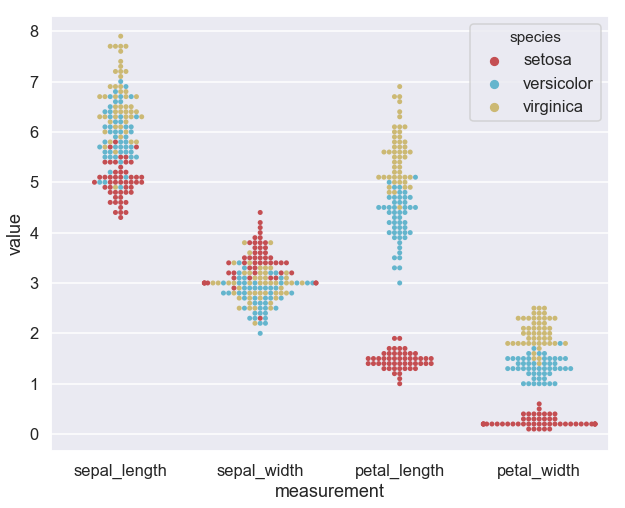

In [7]:
fig, ax = plt.subplots(figsize=(10,8), nrows=1, ncols=1)
sns.swarmplot(x="measurement", y="value", hue="species",
              palette=["r", "c", "y"], data=iris, ax=ax)

What are common techniques for separating classes?

* Linear Regression? No!

* Predict a number between 0-2

| Species    | Encoding |
|------------|----------|
| Setosa     | 0        |
| Veriscolor | 1        |
| Virginica  | 2        |

* Whats wrong with this?

* It creates an **ordering** to the classes. The regression learns that *Virginica* is "closer" to *Verisicolor* than *Setosa*.
* Often this ordering is **not** what we want

* One Hot Encoding to the rescue!
* Turn $C$ classes into an **array** of size $C$

| y       | Sertosa | Versicolor | Virginica |
|---------|---------|------------|-----------|
| Label 1 | 1       | 0          | 0         |
| Label 2 | 0       | 1          | 0         |
| Label 3 | 0       | 0          | 1         |

* Our model should learn to match this vector
* Model output is a probability distribution $\begin{pmatrix}.90 & .05 & .05 \end{pmatrix}$
* If you only have two classes (binary) use one number to represent probability of both classes.

**Classification Models we will learn**
* Logistic Regression 
* Support Vector Machines
* Random Forest

**Techniques you should research later**
* XGBoost

### Logistic Regression 

#### Logistic Regression - Binary

**Binary Case** (0 or 1)

* $x$ is our feature vector: [Sepal Len, etc..]
* $w$ is a parameter vector. $w_0 x_0 + w_1 x_1 + ... + b = z$
* $\sigma(z)=\frac{1}{1+e^{-z}}$
![](assets/sigmoid.png)


\begin{aligned}
z=w^{T} x+b \\
p(y=1)=\sigma(z)=\sigma\left(z\right) \\
z=\log \frac{p(y=1)}{1-p(y=1)} \\
\end{aligned}

\begin{aligned} \operatorname{loss} &=-y \log (\sigma(z))-(1-y) \log (1-\sigma(z)) \\ &=\left\{\begin{array}{ll}{-\log (1-\sigma(z))} & {y=0} \\ {-\log (\sigma(z))} & {y=1}\end{array}\right. \end{aligned}

Minimize the loss by manipulating *w*. Use a solver!

#### Logistic Regression - Multiple Classes

* Assume we have $C$ classes
* One vs all
  * Separately train $C$ *binary* classifiers
  * Select the one with the highest probability
* Multinomial Logistic Regression
  * Use one hot encoding.
  * Train all classifiers together, minimizing their combined loss

### Support Vector Machines 

* SVM's separate binary classes through a linear separating hyperplane
* The plane is constructed by solving a global optimization problem 
* Maximize the margin $M$ while minimizing misclassified values
* Most data can **not** be separated *completely*, so a tuning parameter, $C$ is used to specify the *slack* 

![](assets/svm-simple-example.png)

#### Kernel Trick

* Some data is not linearly separable from the provided features
* Example - Create **new** features from non-linear combinations of your base features
    * Petal_Width_Length = PetalWidth * PetalLength
    * $\left( \begin{array}{l}{n} \\ {2}\end{array}\right) \text { or }_{n} C_{2}=\frac{n !}{2 !(n-2) !}$
    * 4 Features -> 4 Base Features + 6 new non-linear Features
* Map your feature spaces to higher dimensions, $\Phi(X)$
    * 1000 Features -> 1000 Base featurs + 499,500
    * Too expensive to map and store this data into our feature matrix
* Insight - Separation is done by computing dot products between features
* $K(P(x1,y1),P(x2,y2)) = x_{1}^{2} x_{2}^{2}+y_{1}^{2} y_{2}^{2}+2 x_{1} y_{1} * x_{2} y_{2} $
* $ x_{1}^{2} x_{2}^{2}+y_{1}^{2} y_{2}^{2}+2 x_{1} y_{1} * x_{2} y_{2}  = <\left(x_{1}^{2}, y_{1}^{2}, \sqrt{2 x_{1} y_{1}}\right),\left(x_{2}^{2}, y_{2}^{2}, \sqrt{2 x_{2} y_{2}}\right)> $


<center><img src="assets/svm-vis.png"> </img> </center>

[HackerEarth](https://www.hackerearth.com/blog/machine-learning/simple-tutorial-svm-parameter-tuning-python-r/)

### Decision Trees

* A decision tree is drawn upside down with its root at the top. 
* Leaves represent class labels and branches represent conjunctions of features that predict class labels
* Construction - choose a feature at each step that best splits the set of items
    * Entropy
    * Gini
* Repeat this process until all training data is split

![](assets/example_decision_tree.png)

* How are splits done on continous values?
    * In order to come up with a split point, the values are sorted, and the mid-points between adjacent values are evaluated in terms of some metric, usually information gain or gini impurity. For your example, lets say we have four examples and the values of the age variable are (20,29,40,50). The midpoints between the values (24.5,34.5,45) are evaluated, and whichever split gives the best information gain (or whatever metric you're using) on the training data is used. - https://datascience.stackexchange.com/questions/24339/how-is-a-splitting-point-chosen-for-continuous-variables-in-decision-trees
    

In [8]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df_iris.iloc[:,0:4].values, df_iris.iloc[:,4].values)

dot_data = tree.export_graphviz(clf, out_file=None, class_names=clf.classes_, feature_names=df_iris.columns.values[:-1], filled=True) 
graph = graphviz.Source(dot_data) 

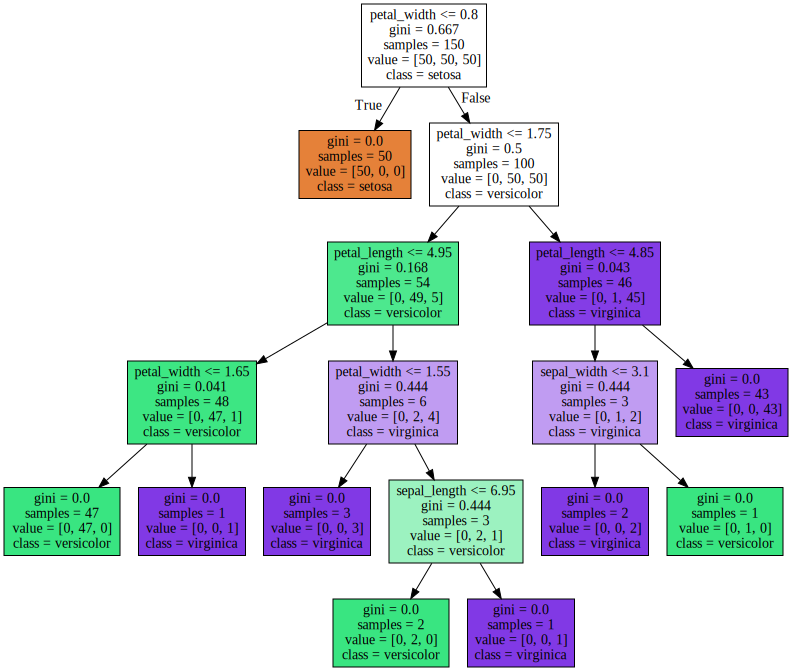

In [9]:
graph

#### Random Forests

* Ensemble Learning - A collection of multiple independently trained learning algorithms
* Bagging - Random sampling of training data
* Random feature selection (if there are alot of features)

![](assets/rf-vis.png)

## Break

* Restroom
* Discuss Projects

![](assets/Oscillating_pendulum.gif)
Ruryk [<a href="https://creativecommons.org/licenses/by-sa/3.0">CC BY-SA 3.0</a>], <a href="https://commons.wikimedia.org/wiki/File:Oscillating_pendulum.gif">from Wikimedia Commons</a>

## Natural Language Processing

# What makes NLP hard



* Raw data is not in a vector space! Characters are not numbers and don't directly relate to eachother.
  * A lot of great work in transforming text into vector spaces using Deep learning.
* Computer can count patterns and such, but don't innately understand concepts that words and phrases provide.
  * There is a conceptual dimension that must be learned.
  * It's difficult to construct and train a model that does this with language.
* Incredible amount of ambiguity in text, even for a human.

**Techniques we will learn**
* Basic Fundamental Steps of NLP
    * Example - Spam Analysis from SMS Text Messages
* Deeper Feature Extraction - Spacey
    *  Word Vectors
    *  Part-of-speech tags, Named entity labels

### Basic Fundamentals of NLP

1. Look at data
2. Preprocess Text
3. Tokenization
4. Compute TF-IDF scores
5. Choose and Fit Models
6. Hyperparameter Search with Cross Validation

References:
[In Machines We Trust](http://inmachineswetrust.com/posts/sms-spam-filter/), 
[SKLearn](https://scikit-learn.org/stable/modules/cross_validation.html) [Machine Learning Mastery](https://machinelearningmastery.com/clean-text-machine-learning-python/)

In [10]:
df_spam = pd.read_table('data/SMSSpamCollection.txt', header=None)
df_spam = df_spam.rename(columns={0: "Label", 1: "Text"})

Data set comes from UCI and is a public set of SMS labeled messages

Data breakdown:

| Ham  | Spam |
|------|------|
| 4825 | 747  |


https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

In [11]:
df_spam.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
np.random.seed(1)
ham_examples = np.random.choice(df_spam[df_spam.Label == 'ham'].index, 2)
spam_examples = np.random.choice(df_spam[df_spam.Label == 'spam'].index, 2)
examples = ham_examples.tolist() + spam_examples.tolist()
df_examples = df_spam.iloc[examples]
pd.set_option('display.max_colwidth', -1)

#### Look at Data

In [13]:
display(HTML(df_examples.to_html(index=False)))

Label,Text
ham,"Awesome, I'll see you in a bit"
ham,"Hey j! r u feeling any better, hopeSo hunny. i amnow feelin ill & ithink i may have tonsolitusaswell! damn iam layin in bedreal bored. lotsof luv me xxxx"
spam,"You are guaranteed the latest Nokia Phone, a 40GB iPod MP3 player or a £500 prize! Txt word: COLLECT to No: 83355! IBHltd LdnW15H 150p/Mtmsgrcvd18+"
spam,XMAS iscoming & ur awarded either £500 CD gift vouchers & free entry 2 r £100 weekly draw txt MUSIC to 87066 TnC www.Ldew.com1win150ppmx3age16subscription


#### Preprocess Text
* Encode the ham/spam label as 0 or 1. 
* Remove Punctuation
* Leading and Ending White space - ' Hey '
* Replace common occurring text patterns with a single word - Regular Expression
    * 'http://spam.me' --> url
    * '$' '£'& --> 'mnsymb'
    * '55555' -- 'shrtcode'
    * '867-5309' --> 'phonenumber'
    * '88' --> 'number'
* Lower case
* Port Stemmer - 'testing' -> 'test'
* Stop words - 'the', 'a'


In [14]:
porter = nltk.PorterStemmer()
stop_words = nltk.corpus.stopwords.words('english')

def preprocess_text(text):
    clean_text = regex_clean(text)
    clean_text = ' '.join(
        porter.stem(term.strip()) 
        for term in clean_text.split()
        if term not in set(stop_words)
    )
    clean_text = ' '.join(term.lower() for term in clean_text.split())
    return clean_text
def regex_clean(text):
    clean_text = re.sub(r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})', 'url',
                     text)
    clean_text = re.sub(r'£|\$', 'mnsymb', clean_text)
    clean_text = re.sub(
        r'[2-9]\d{2}-\d{3}-\d{4}',
        'phonenumber', clean_text)
    clean_text = re.sub(r'[^\w\d\s]', ' ', clean_text)
    clean_text = re.sub(r'\s\d{4,6}\s', ' shrtcode ', clean_text)
    clean_text = re.sub(r'\d+(\.\d+)?', ' number ', clean_text)

    clean_text = re.sub(r'\s+', ' ', clean_text)

    return clean_text
df_spam['clean_text'] = df_spam.Text.apply(preprocess_text)

le = LabelEncoder()
df_spam['label_encoded'] = le.fit_transform(df_spam['Label'].values)  

In [15]:
df_spam.head()

,Label,Text,clean_text,label_encoded
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go jurong point crazi avail bugi n great world la e buffet cine got amor wat,0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri number wkli comp win fa cup final tkt number st may shrtcode text fa shrtcode receiv entri question std txt rate t c appli number number,1
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,0
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah i think goe usf live around though,0


In [16]:
preprocess_text('TEXT me at 801-458-3434 to win prize at www.spam.com')

'text phonenumb win prize url'

In [17]:
display(HTML(df_spam.iloc[examples].to_html(index=False)))

Label,Text,clean_text,label_encoded
ham,"Awesome, I'll see you in a bit",awesom i see bit,0
ham,"Hey j! r u feeling any better, hopeSo hunny. i amnow feelin ill & ithink i may have tonsolitusaswell! damn iam layin in bedreal bored. lotsof luv me xxxx",hey j r u feel better hopeso hunni amnow feelin ill ithink may tonsolitusaswel damn iam layin bedreal bore lotsof luv xxxx,0
spam,"You are guaranteed the latest Nokia Phone, a 40GB iPod MP3 player or a £500 prize! Txt word: COLLECT to No: 83355! IBHltd LdnW15H 150p/Mtmsgrcvd18+",you guarante latest nokia phone number gb ipod mp number player mnsymb number prize txt word collect no shrtcode ibhltd ldnw number h number p mtmsgrcvd number,1
spam,XMAS iscoming & ur awarded either £500 CD gift vouchers & free entry 2 r £100 weekly draw txt MUSIC to 87066 TnC www.Ldew.com1win150ppmx3age16subscription,xma iscom ur award either mnsymb number cd gift voucher free entri number r mnsymb number weekli draw txt music shrtcode tnc url,1


#### Tokenization

* Our features will be every term (word) of the corpus of all terms in all documents (examples)
* This assumes that each word is linearly independent of another. 
* Are you hungry? vs You are hungry!
* Use n-grams
* Are you hungry => 'are', 'you', 'hungry', 'are you', 'you hungry'

In [18]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_data = vectorizer.fit_transform(df_spam.clean_text)
y_label = df_spam['label_encoded'].values

#### Compute Term Frequency-Inverse document Frequency (TF-IDF)

* TF-IDF is a weight used to evaluate how important a term is to a document (one example) in the collection (all examples)
* Term Frequency, tf
    * Count of how many times a term occurred in the document
* Inverse Document Frequency
    * Measures how important a term is
<break>
<center>
$$
\operatorname{tf}(t,d) = |t \in d| \\
\operatorname{idf}(t, D)=\log \frac{N}{|\{d \in D : t \in d\}|} \\ 
 \operatorname{tfidf}(t, d, D)=\operatorname{tf}(t, d) \cdot \operatorname{idf}(t, D)
$$
</center>

$N$ is count all documents. $ |\{d \in D : t \in d\}| $  is the number of documents where the term $t$ appears 


In [19]:
X_data

<5572x39201 sparse matrix of type '<class 'numpy.float64'>'
	with 102112 stored elements in Compressed Sparse Row format>

$5572 \cdot 39201 = 218,427,972 = 800 MB$

$\frac{102112}{218,427,972} = \%0.04 $


#### Choose Models and fit

* Support Vector Machines
* Random Forest

* Each of these models have many different *hyperparameters* to tune
* Start with defaults parameters for models
    * SVM - Kernel=linear, C=1.0
    * Random Forest - Split-gini, number of estimators = 20


In [20]:
def create_dataframe(sample_space, train_scores, valid_scores, model_name='SVM', params=''):
    # How many folds in k folds validation
    folds = train_scores.shape[1]
    # total number of samples per model
    samples_per_model = sample_space.shape[0] * folds
    df = pd.DataFrame(
        np.stack((np.repeat(sample_space, folds) , train_scores.flatten(),
                  valid_scores.flatten(), [model_name] * samples_per_model, [params] * samples_per_model), axis=1),
        columns=['# of training examples', 'Training set', 'Validation set', 'Model', 'Params']
    )
    dtype={'# of training examples':np.int,'Training set': np.float, 'Validation set': np.float, 'Model': str, 'Params': str }
    for k, v in dtype.items():
        df[k] = df[k].astype(v)
    
    return pd.melt(
        df,
        id_vars=['# of training examples', 'Model', 'Params'],
        value_vars=['Training set', 'Validation set'],
        var_name='Scores',
        value_name='F1 score'
    )

def train_models(models, X_data, y_label):
    """Trains models with the given data
    """
    df = pd.DataFrame()
    for (model_name, model) in models:
        sample_space = np.linspace(500, X_data.shape[0] * 0.8, 10, dtype='int')
        train_sizes, train_scores, valid_scores = learning_curve(
            estimator=model,
            X=X_data,
            y=y_label,
            train_sizes=sample_space,
            cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=1),
            scoring='f1',
            n_jobs=-1,
            random_state=1
        )
        df_ = create_dataframe(sample_space, train_scores, valid_scores, model_name=model_name)
        df = df.append(df_)
    return df
    

In [21]:
# models = [('SVM', LinearSVC()), ('RF', RandomForestClassifier()), ('Adaboost', AdaBoostClassifier())]
models = [('SVM', SVC(kernel='linear')), ('RF', RandomForestClassifier())]
df_compare = train_models(models, X_data, y_label)
# SVM defaults C to 1, uses hinge loss
# Random Forest defaults to split on gini, n estimators 20

In [22]:
import warnings
warnings.simplefilter("ignore")

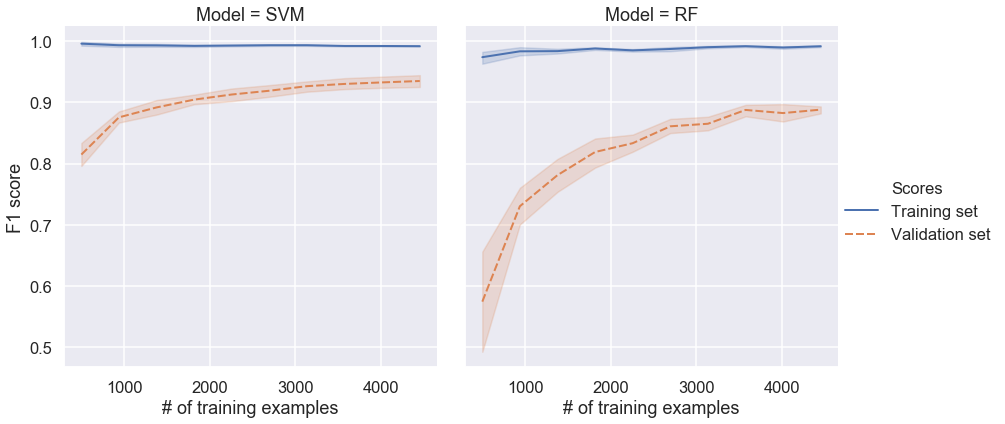

In [23]:
g = sns.relplot(x="# of training examples", y="F1 score",
                hue="Scores", style="Scores", col="Model",
                height=6, aspect=1, kind="line", data=df_compare)

* Every training session used k folds validation of 10 splits
* The x axis denotes how much data we allow the model to see for training
* Each training session has 10 validation error results and 10 training error results. You can see the 95% confidence intervals
* As more data is given you can see the model learning better

#### Hyperparamter Tuning

* There are many hyperparameter to models that can influence their performance
* SVM is influenced by:
    * $C$ - $1e-6, 0.1, 1, 10, 100$
    * Kernel - linear, radial basis function, poly
* We desire to train and validate all **15** combinations of these model parameters
* Choose model with best performance!
* If using python use function called `GridSearchCV` in `sklearn`.

In [24]:
param_grid = [{'C': [1e-6, 0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf'] }]

X_train, X_test, y_train, y_test = train_test_split(
    X_data,
    y_label,
    test_size=0.2,
    random_state=2,
    stratify=y_label
)

clf = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    scoring='f1',
    return_train_score=True,
    n_jobs=-1
)
results = clf.fit(X_train, y_train)

* Macro average looks at the metrics of all classes and averages. 

* Micro-average will aggregate the contributions of all classes to compute the average metric

* The support is the number of samples of the true response that lie in that class.

In [25]:
test_score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=[['actual', 'actual'], ['spam', 'ham']],
    columns=[['predicted', 'predicted'], ['spam', 'ham']]
)

report = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'], output_dict=True)
report = pd.DataFrame(report).transpose()

In [26]:
print("Optimal Parameters {}".format(clf.best_params_))
print("Test Score: {:.1f}%".format(test_score * 100))

Optimal Parameters {'C': 10, 'kernel': 'linear'}
Test Score: 92.6%


In [27]:
report

,f1-score,precision,recall,support
Ham,0.989214,0.981651,0.996894,966.0
Spam,0.925795,0.977612,0.879195,149.0
micro avg,0.981166,0.981166,0.981166,1115.0
macro avg,0.957505,0.979632,0.938045,1115.0
weighted avg,0.980739,0.981112,0.981166,1115.0


#### Things to improve

* Remove useless words from model
* Spelling correction?
* Specific TF-IDF implementation didn't normalize against document length
* Better feature extraction

### NLP Advanced Feature Extraction

* Warning - This next part is farther away from my expertise
* There are many state of the art text feature extractors
* [spaCy](https://spacy.io/) - Extremely fast python library
    * Prebuilt models to for large-scale information extraction
    * What is the text about? What is the context? Who, What? When?
    * [Textacy](https://chartbeat-labs.github.io/textacy/getting_started/quickstart.html#working-with-text) - A higher level library that wraps around  spaCy
* [AllenNLP](https://allennlp.org/) - GPU accelerated model training
    * Design and evaluate new deep learning models very quickly
* [NLTK](https://www.nltk.org/) - Natural Language Tool Kit
    * "Text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries"


Focus on spaCy and some of its capabilities

* Named Entity Recognition
* Similarity


In [28]:
import spacy

nlp = spacy.load('en_core_web_md') 
doc = nlp(u'Hi is this JPMC based in London? I need to report credit card fraud')

for ent in doc.ents:
    print(ent.text, ent.label_)

JPMC PERSON
London GPE


In [29]:
doc = nlp(u'I have been waiting for my pizza for 6 HOURS! I am very disappointed!')
doc.sentiment

0.0

In [30]:
tokens = nlp(u'dog cat apple orange')
corr = np.zeros((len(tokens), len(tokens)))
for i, token1 in enumerate(tokens):
    for j, token2 in enumerate(tokens):
        sim = token1.similarity(token2)
        corr[i,j] = sim
df = pd.DataFrame(corr, columns=list(map(str,list(tokens.__iter__()))), index=list(map(str,list(tokens.__iter__()))))
# Generate a mask for the upper triangle
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.color_palette("Blues")

dog_vector = list(tokens.__iter__())[0].vector

* You can also convert words into vectors
* Here is an example of the "dog" vector


In [31]:
print("Vector Size: {}".format(dog_vector.shape[0]))
print("First 50 elements: \n ", dog_vector[:50])

Vector Size: 300
First 50 elements: 
  [-0.40176   0.37057   0.021281 -0.34125   0.049538  0.2944   -0.17376
 -0.27982   0.067622  2.1693   -0.62691   0.29106  -0.6727    0.23319
 -0.34264   0.18311   0.50226   1.0689    0.14698  -0.4523   -0.41827
 -0.15967   0.26748  -0.48867   0.36462  -0.043403 -0.24474  -0.41752
  0.089088 -0.25552  -0.55695   0.12243  -0.083526  0.55095   0.3641
  0.15361   0.55738  -0.90702  -0.049098  0.3858    0.38      0.14425
 -0.27221  -0.37016  -0.12904  -0.15085  -0.38076   0.049583  0.12755
 -0.082788]


* Here is an example of comparing "dog', "cat", "apple", "orange"

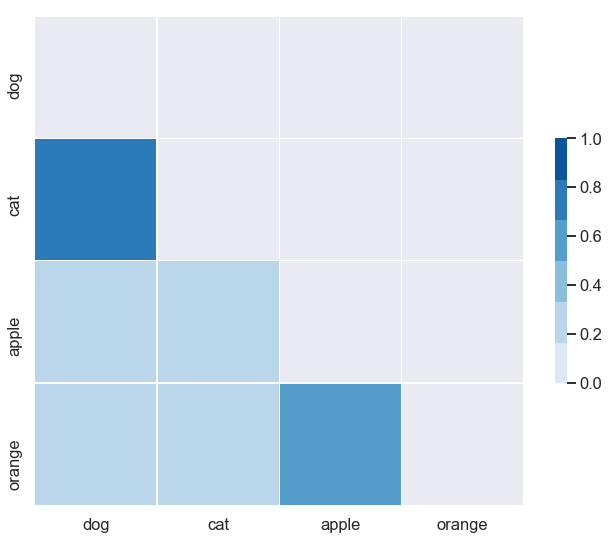

In [32]:
# Draw the heatmap with the mask and correct aspect ratio
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df, mask=mask, cmap=cmap,vmin=0, vmax=1.0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
df

,dog,cat,apple,orange
dog,1.000000,0.801685,0.263390,0.274251
cat,0.801685,1.000000,0.282138,0.328847
apple,0.263390,0.282138,1.000000,0.561892
orange,0.274251,0.328847,0.561892,1.000000


## Break

* Restroom
* Discuss Projects

![](assets/sin_cos.gif)
LucasVB [Public domain], <a href="https://commons.wikimedia.org/wiki/File:Circle_cos_sin.gif">from Wikimedia Commons</a>

## Computer Vision

### Computer Vision Challenges and Advances

* Why is computer vision hard?
* Just like with NLP, vision is more than just about pixels. There are concepts of *things* and *actions*
* There is reasoning and experience involved in matching raw image data to these concepts
* In addition pictures are often very high dimensional

<center><img src="assets/bird_snake.jpg"></center>
Charles J Sharp [<a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>]

$$
256 * 256 * 3 = 196,608
$$

720P = 2,764,800

* There have been some major advances in the field of computer vision over the last 5 years
* Deep learning aided by General-purpose computing on graphics processing units (GPGPU, or GPU)
* Convolutional Neural Network to provide methods of learning high level features


$$
\left[ \begin{array}{rrr}{1} & {0} & {-1} \\ {0} & {0} & {0} \\ {-1} & {0} & {1}\end{array}\right] 
$$

<center><img src="assets/cnn_filter_before.png"></center>

Aphex34 [<a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>], <a href="https://commons.wikimedia.org/wiki/File:Typical_cnn.png">from Wikimedia Commons</a>

<center><img src="assets/typical_cnn.png"></center>
Aphex34 [<a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>], <a href="https://commons.wikimedia.org/wiki/File:Typical_cnn.png">from Wikimedia Commons</a>

* Object Localization and Detection
    * RCNN
    * Fast RCNN
    * Faster RCNN
    * Yolo
    * SSD
    
 <center><img src="assets/object-detection.PNG"></center>

Source [YOLO](https://pjreddie.com/darknet/yolo/)

 
* Image Segmentation
    * FCN
    * Deeplab
    * Others but not deeply familiar with
    
<center><img src="assets/image_segmentation.png"></center>

Source [NVIDIA](https://devblogs.nvidia.com/image-segmentation-using-digits-5/)